<a href="https://colab.research.google.com/github/sambhavgsharma/MLSpecializationLabs/blob/main/classification_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([0.0,1 ,2, 3,4,5])
y_train = np.array([0,0,0,1,1,1,])
x_train2 = np.array([[0.5,0.5],[1,1],[1.5,0.5],[3, 0.5], [2,2],[1,2.5]])
y_train2 = np.array([0, 0, 0, 1,1,1])


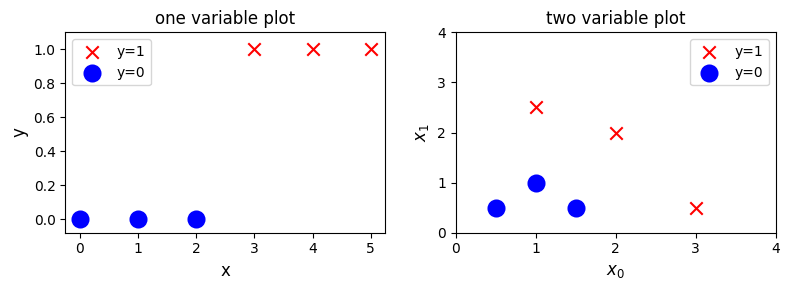

In [5]:
pos = (y_train2 == 1)
neg = (y_train2 == 0)

fig, ax = plt.subplots(1, 2, figsize=(8, 3))

# First plot (1D)
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label='y=1')
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, c='blue', label='y=0',
              facecolors='none', edgecolors='blue', lw=3)
ax[0].set_ylim(-0.08, 1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

# Second plot (2D features)
ax[1].scatter(x_train2[pos, 0], x_train2[pos, 1], marker='x', s=80, c='red', label='y=1')
ax[1].scatter(x_train2[neg, 0], x_train2[neg, 1], marker='o', s=100, c='blue', label='y=0',
              facecolors='none', edgecolors='blue', lw=3)
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()

plt.tight_layout()
plt.show()


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def custom_addpt_onclick(x_train, y_train, w_in, b_in, logistic=False):
    fig, ax = plt.subplots()

    # Scatter initial data
    pos = (y_train == 1)
    neg = (y_train == 0)
    if logistic:
        # 2D features → plot x0 vs x1
        ax.scatter(x_train[pos, 0], x_train[pos, 1], marker='x', s=80, c='red', label='y=1')
        ax.scatter(x_train[neg, 0], x_train[neg, 1], marker='o', s=100, facecolors='none',
                   edgecolors='blue', lw=3, label='y=0')
    else:
        # 1D feature → plot x vs y
        ax.scatter(x_train[pos], y_train[pos], marker='x', s=80, c='red', label='y=1')
        ax.scatter(x_train[neg], y_train[neg], marker='o', s=100, facecolors='none',
                   edgecolors='blue', lw=3, label='y=0')

    ax.set_xlabel("x0")
    ax.set_ylabel("x1" if logistic else "y")
    ax.set_title("Click to add points")
    ax.legend()

    # Draw decision boundary
    if logistic:
        x_vals = np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 100)
        y_vals = -(w_in[0] * x_vals + b_in) / w_in[1]
        ax.plot(x_vals, y_vals, 'g--')
    else:
        x_vals = np.linspace(np.min(x_train), np.max(x_train), 100)
        y_vals = w_in * x_vals + b_in
        ax.plot(x_vals, y_vals, 'g--')

    # Click handler
    def onclick(event):
        if event.inaxes != ax:
            return
        if logistic:
            x0 = event.xdata
            x1 = event.ydata
            pred = w_in[0] * x0 + w_in[1] * x1 + b_in
            label = 1 if pred >= 0 else 0
            if label == 1:
                ax.scatter(x0, x1, marker='x', s=80, c='red')
            else:
                ax.scatter(x0, x1, marker='o', s=100, facecolors='none', edgecolors='blue', lw=3)
        else:
            ax.scatter(event.xdata, event.ydata, marker='x', s=80, c='red')
        fig.canvas.draw()

    # Connect click event
    fig.canvas.mpl_connect('button_press_event', onclick)

    plt.show()


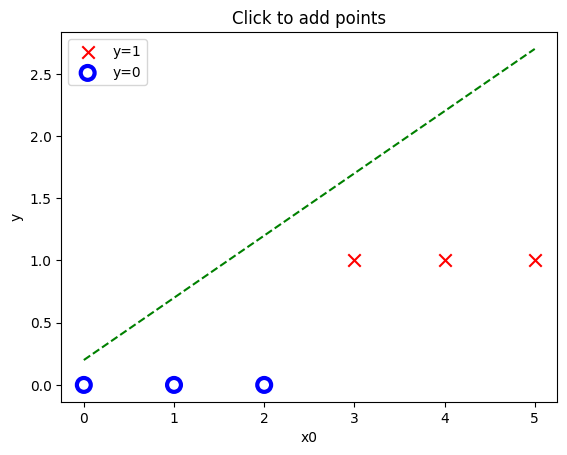

In [11]:
x_train = np.array([0.0, 1, 2, 3, 4, 5])
y_train = np.array([0, 0, 0, 1, 1, 1])
w_in = 0.5
b_in = 0.2

custom_addpt_onclick(x_train, y_train, w_in, b_in, logistic=False)
